In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from scipy.integrate import odeint

# Minimal Model

In [10]:
a_exp = 0.0
c1_exp = -1.0

In [11]:
## Calibrated by MWF (newuq)
def A(q,a,eta,Re):
    return a*(Re/67)**(a_exp)*((q**2 + eta**2)**(1/2) - eta)

def B(q,b):
    return b*q

def eps(q,c1,Re):
    return c1*(Re/67)**(c1_exp)*q

Need to define the perturbations of $A$, $B$, and $\varepsilon_0$

In [12]:
## Calibrated by MWF (newuq)
def dA(qe,a,eta,Re):
    return a*(Re/67)**(a_exp)*qe*(qe**2 + eta**2)**(-1/2)

def dB(b):
    return b

def deps(qe,c1,Re):
    return c1*(Re/67)**(c1_exp)

In [13]:
# Define nullclines (for plotting)
def null_u(q,beta,eta,a,alpha,Re):
    return -beta*A(q,a,eta,Re)/(alpha+beta**2/Re) + 1 # u nullcline
def null_q(q,beta,eta,a,c1,alpha,Re): 
    return (2*alpha*q + eps(q,c1,Re))/(beta*A(q,a,eta,Re)/2)

In [14]:
# For integrating the ODE
def rhs(x,t,beta,a,c1,eta,alpha,Re):
    u,q = x
    dxdt = [-beta*A(q,a,eta,Re) - (alpha+beta**2/Re)*(u-1), beta*u*A(q,a,eta,Re)/2 - eps(q,c1,Re)-2*alpha*q]
    return dxdt

# Nullclines

turbulent fixed point (if any). Re = 65.0000, (q_e,u_e) = (0.0215, 0.8322)
turbulent fixed point (if any). Re = 72.0000, (q_e,u_e) = (0.0199, 0.8348)
turbulent fixed point (if any). Re = 80.0000, (q_e,u_e) = (0.0304, 0.7022)
turbulent fixed point (if any). Re = 90.0000, (q_e,u_e) = (0.0345, 0.6239)
turbulent fixed point (if any). Re = 100.0000, (q_e,u_e) = (0.0366, 0.5659)
turbulent fixed point (if any). Re = 125.0000, (q_e,u_e) = (0.0382, 0.4688)
turbulent fixed point (if any). Re = 150.0000, (q_e,u_e) = (0.0379, 0.4080)
turbulent fixed point (if any). Re = 200.0000, (q_e,u_e) = (0.0364, 0.3304)
turbulent fixed point (if any). Re = 250.0000, (q_e,u_e) = (0.0347, 0.2871)
turbulent fixed point (if any). Re = 500.0000, (q_e,u_e) = (0.0301, 0.1950)
turbulent fixed point (if any). Re = 2000.0000, (q_e,u_e) = (0.0253, 0.1279)


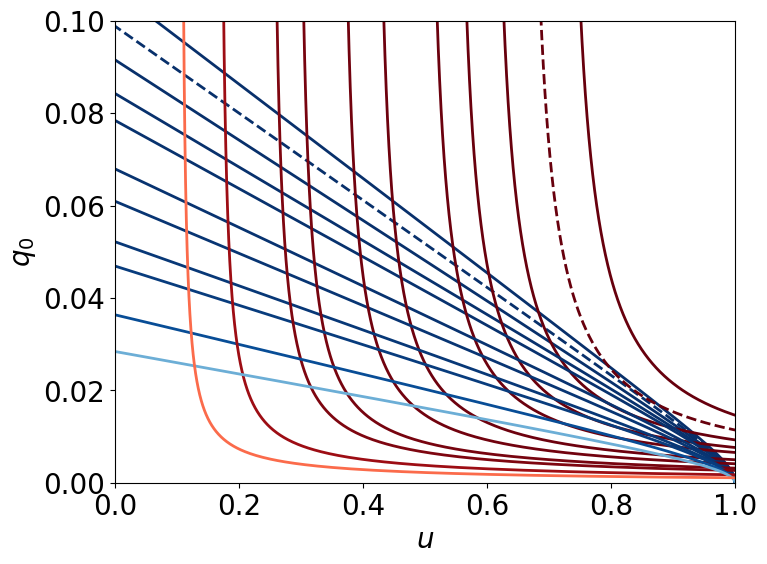

In [19]:
# Parameters
Lz = 512.
Lx = 512.
beta = np.pi/2
alpha = 0.01
theta = 24
theta = theta/180*np.pi
wlam = np.sin(theta)
ulam = np.cos(theta)

# Calibrated using single band MWF mean, a_exp = 0, eps_exp = -1, nu_t_exp = 1.0 (Re_c = 72)
def nu_t(qe,C_t,Re):
    return C_t*qe*Re**(-c1_exp) + 1/Re
C_t = 0.05
a = 0.3
c1 = 0.144
b = 0.0

kappa = 0.045
kexp = 0.0
eta = 5e-3

Res = [
    65,
    72,
    80,
    90,
    100,
    125,
    150,
    200,
    250,
    500,
    2000,
]

plt.figure(figsize=(8,6))
for Re in Res:
    # Find equilibrium
    qplt = np.linspace(1e-4,1,10000)
    # Equilibria
    diff = np.abs(null_u(qplt,beta,eta,a,alpha,Re)-null_q(qplt,beta,eta,a,c1,alpha,Re))
    ind1 = np.argsort(diff)[0]
    ind2 = np.argsort(diff)[1]
    # Check for the largest q
    if qplt[ind1]<qplt[ind2]:
        ind = ind2
    else:
        ind = ind1
    qe = qplt[ind]
    u1_se = null_u(qplt,beta,eta,a,alpha,Re)[ind]-1
    u1e = u1_se*np.cos(theta)
    w1e = u1_se*np.sin(theta)
    print('turbulent fixed point (if any). Re = %.4f, (q_e,u_e) = (%.4f, %.4f)' % (Re,qe,u1_se+1))
    if Re == 72:
        plt.plot(null_u(qplt,beta,eta,a,alpha,Re),qplt,c=cm.Blues_r((Re-np.min(Res))/(np.max(Res)-np.min(Res))/2),lw=2,ls='--')
        plt.plot(null_q(qplt,beta,eta,a,c1,alpha,Re),qplt,c=cm.Reds_r((Re-np.min(Res))/(np.max(Res)-np.min(Res))/2),lw=2,ls='--')
    else:
        plt.plot(null_u(qplt,beta,eta,a,alpha,Re),qplt,c=cm.Blues_r((Re-np.min(Res))/(np.max(Res)-np.min(Res))/2),lw=2)
        plt.plot(null_q(qplt,beta,eta,a,c1,alpha,Re),qplt,c=cm.Reds_r((Re-np.min(Res))/(np.max(Res)-np.min(Res))/2),lw=2)

plt.xlabel(r'$u$',fontsize=20)
plt.ylabel(r'$q_0$',fontsize=20)
plt.gca().tick_params(axis='both', which='major', labelsize=20)
plt.xlim(0,1)
plt.ylim(0,0.1)
plt.show()

# Time integration of local dynamics

In [20]:
# Time
dt = 0.01
t = np.arange(0,1200,dt)

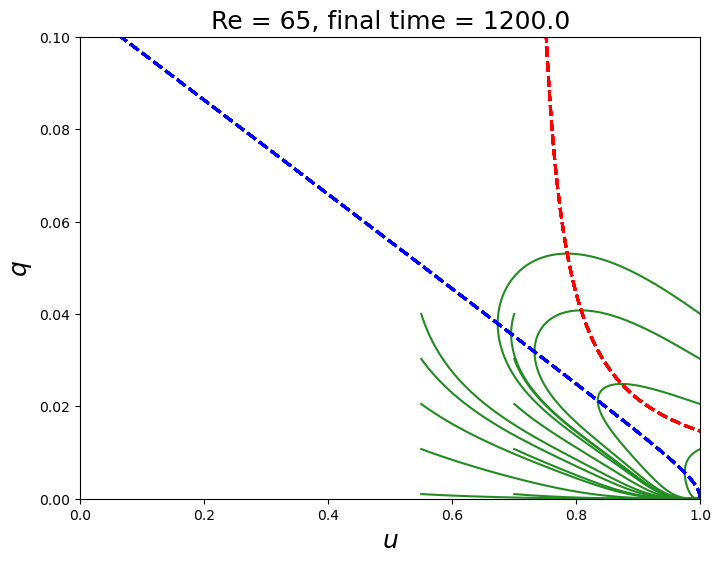

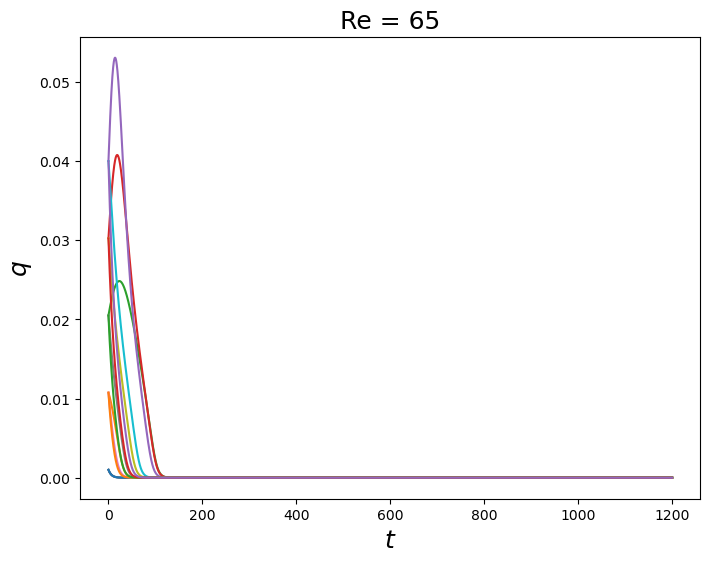

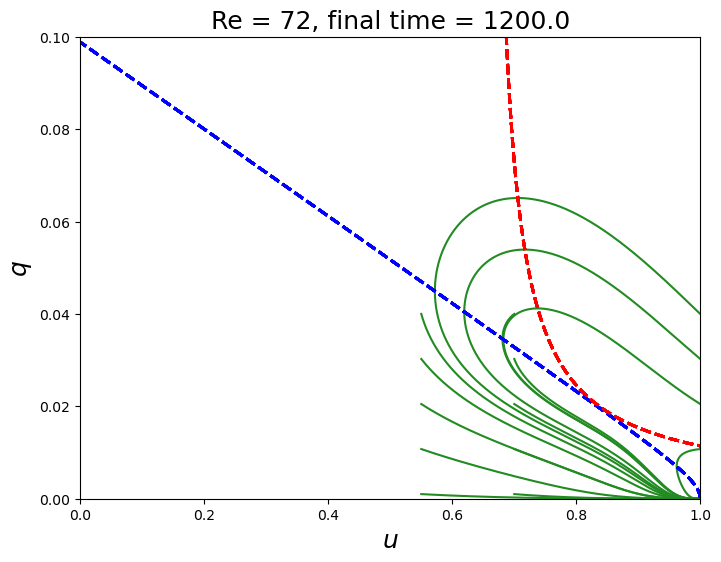

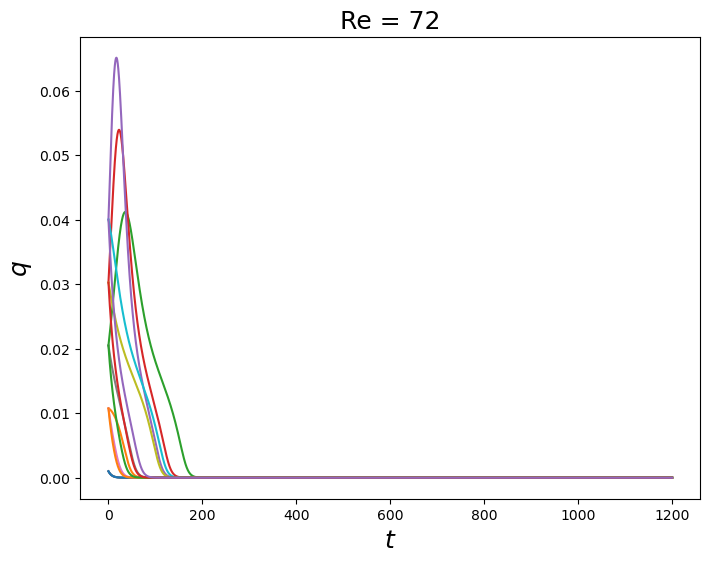

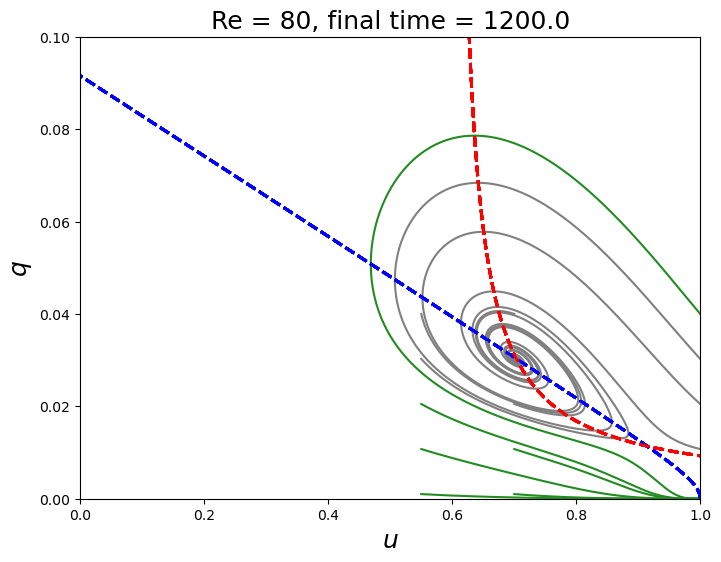

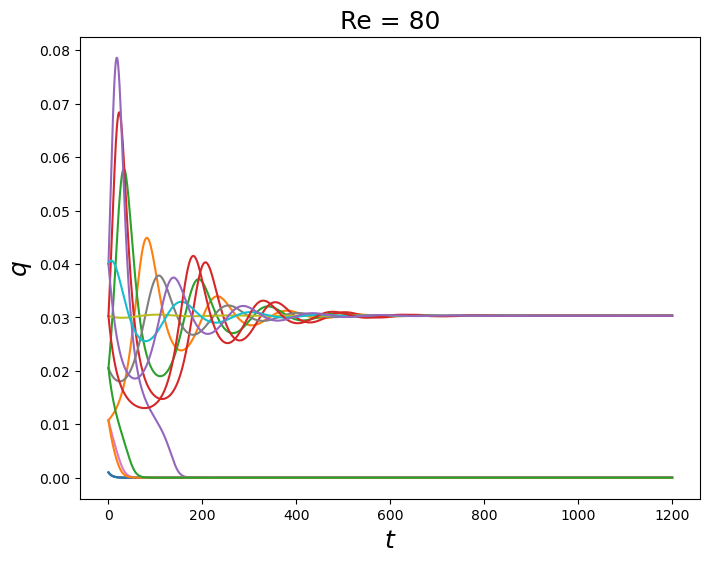

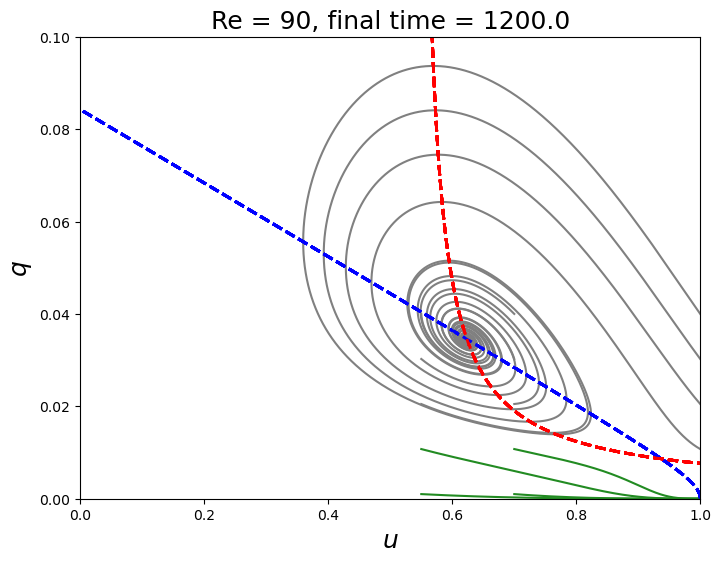

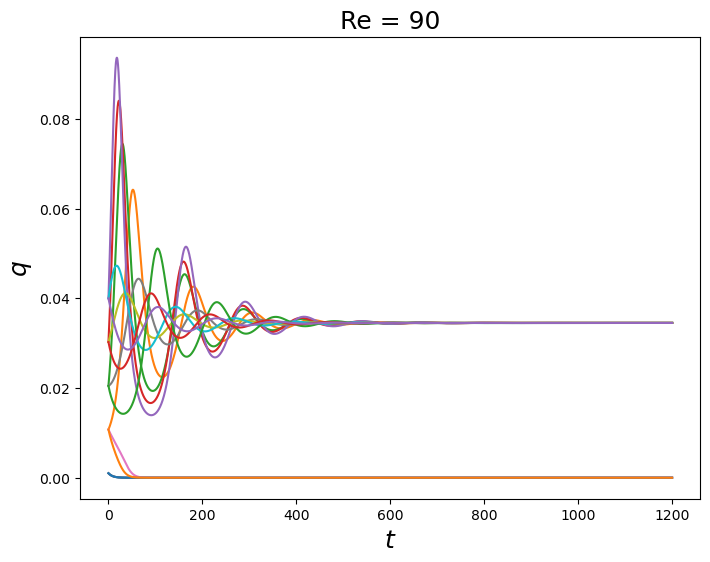

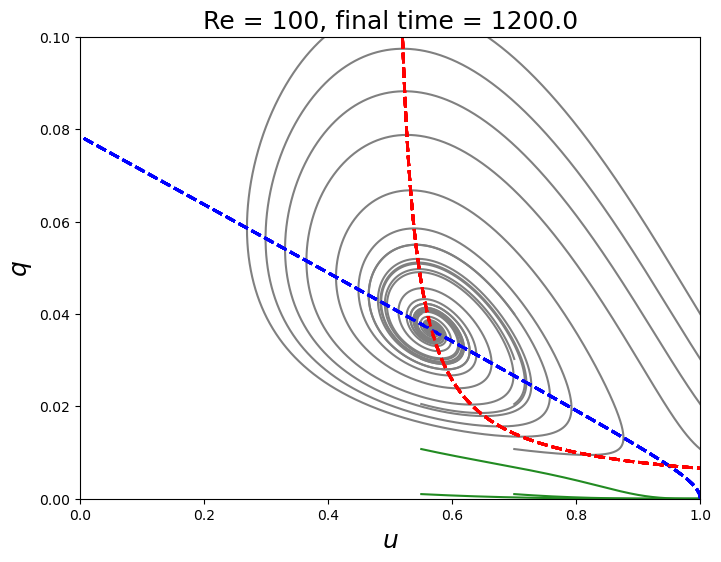

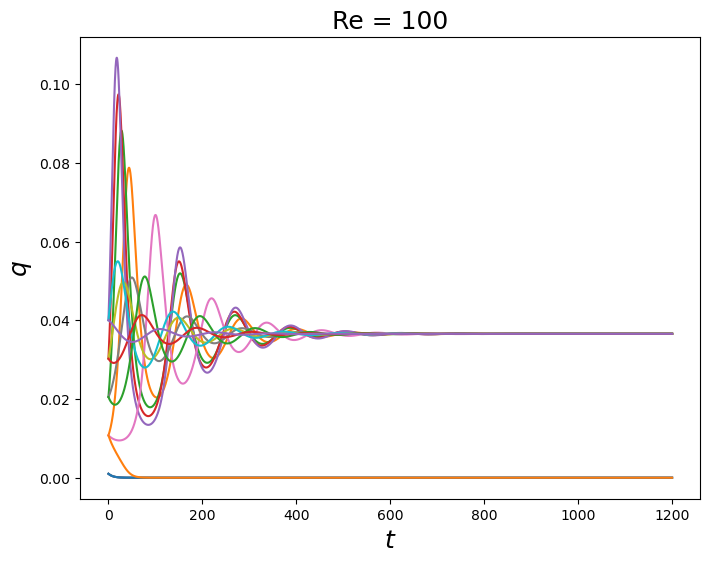

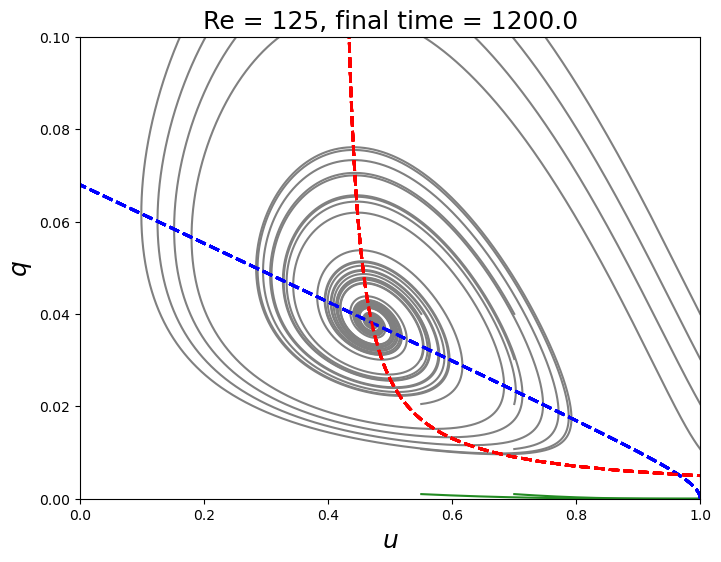

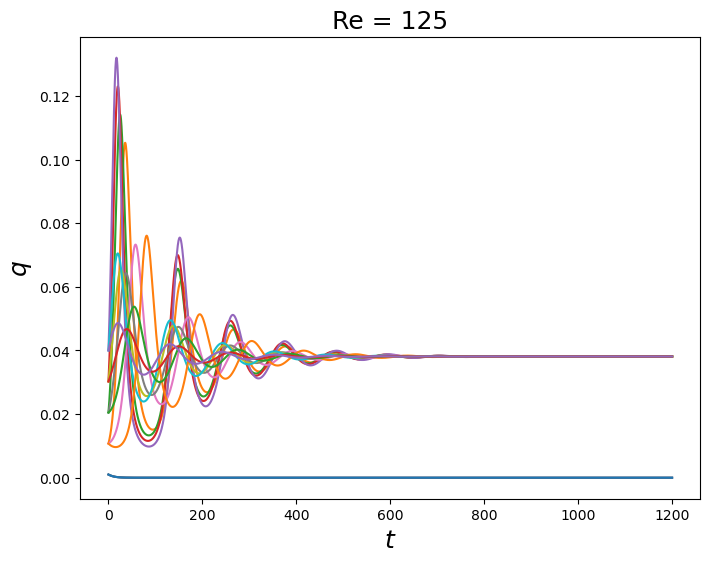

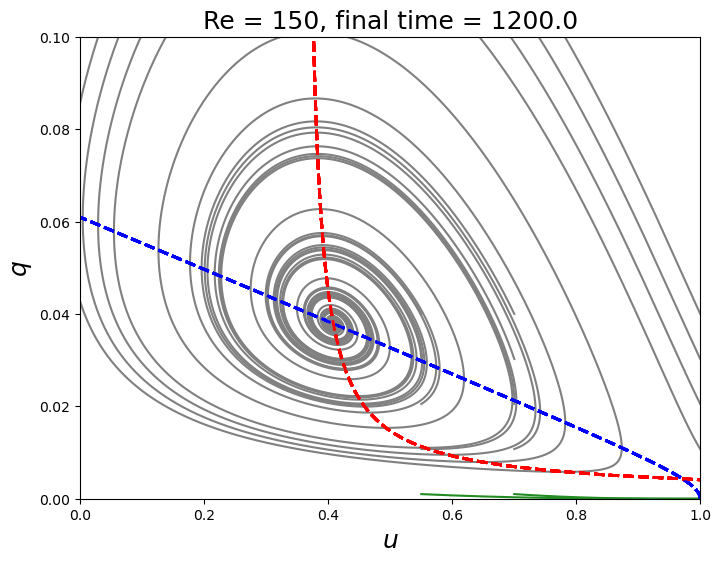

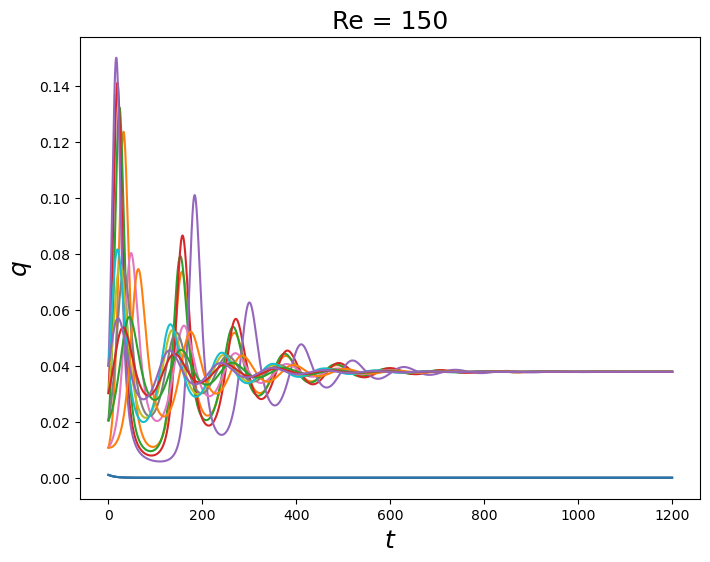

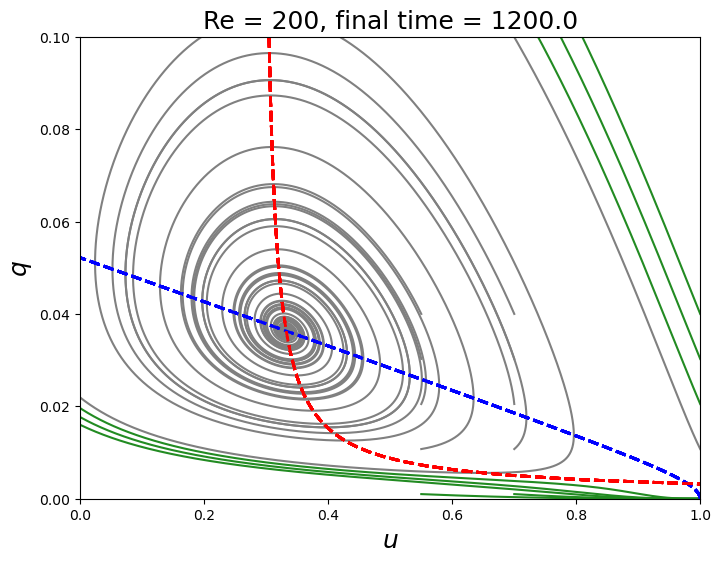

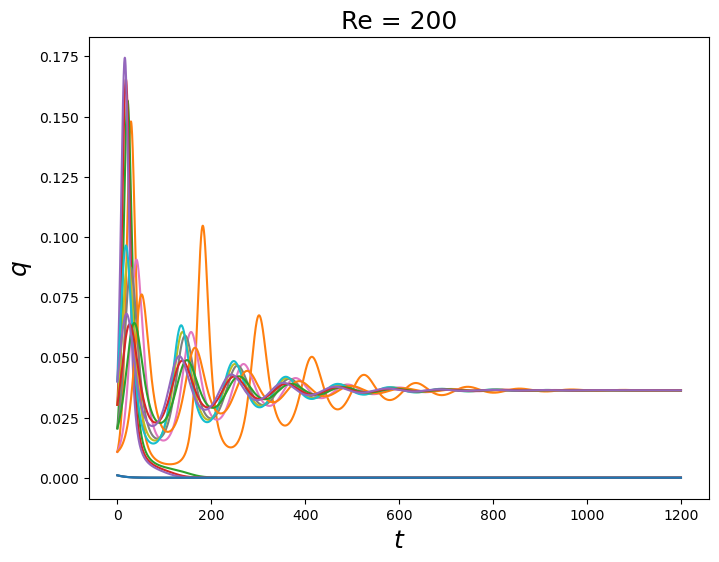

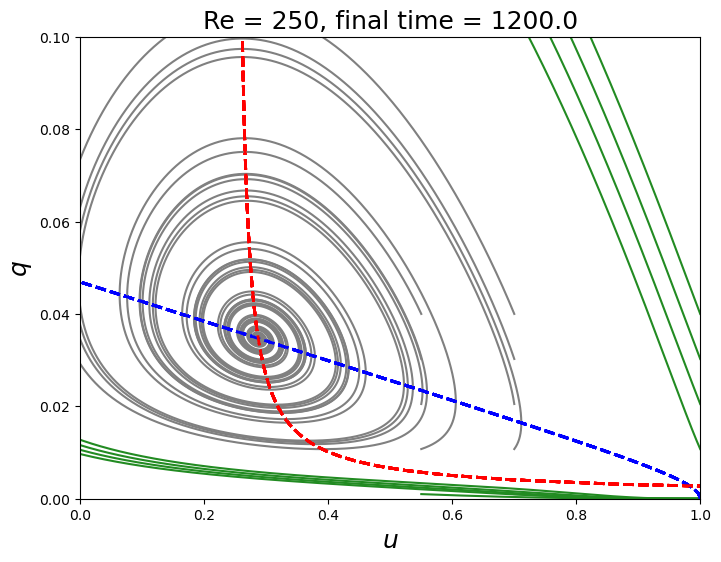

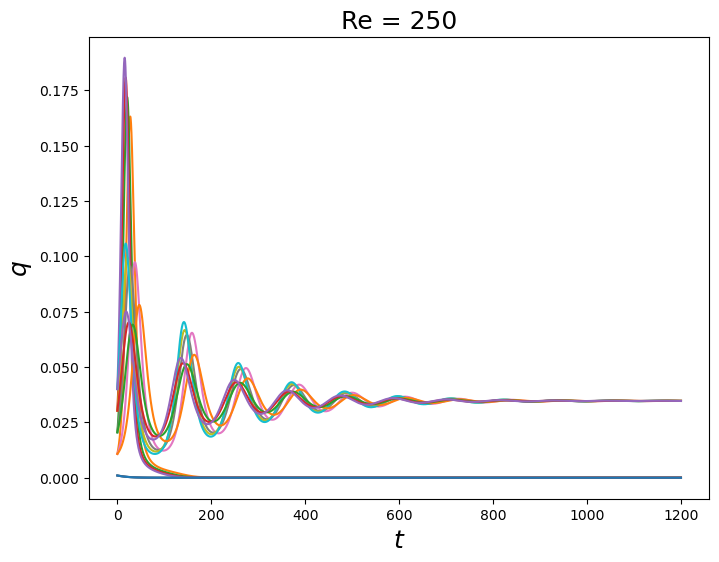

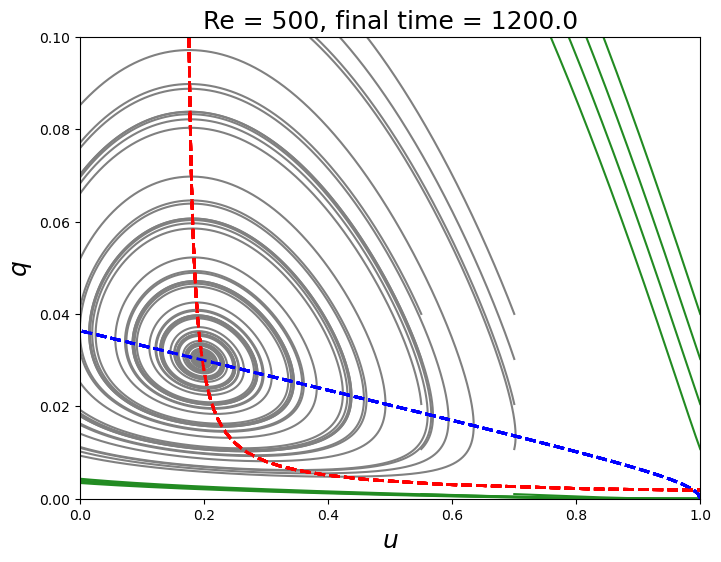

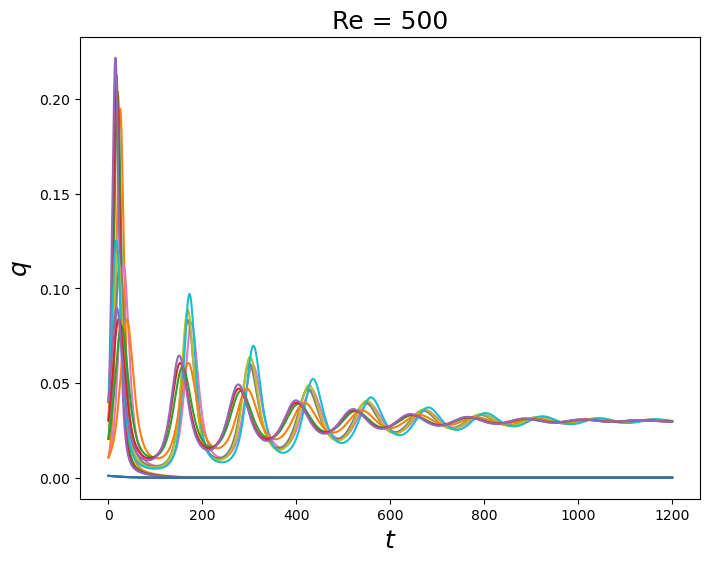

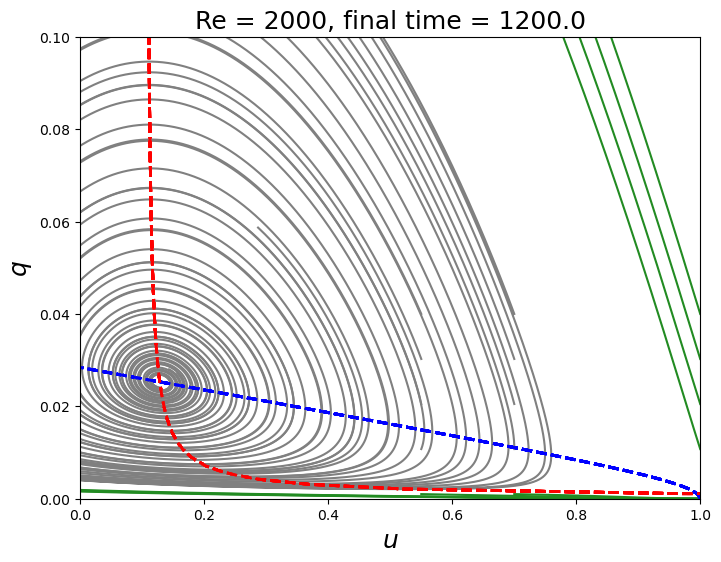

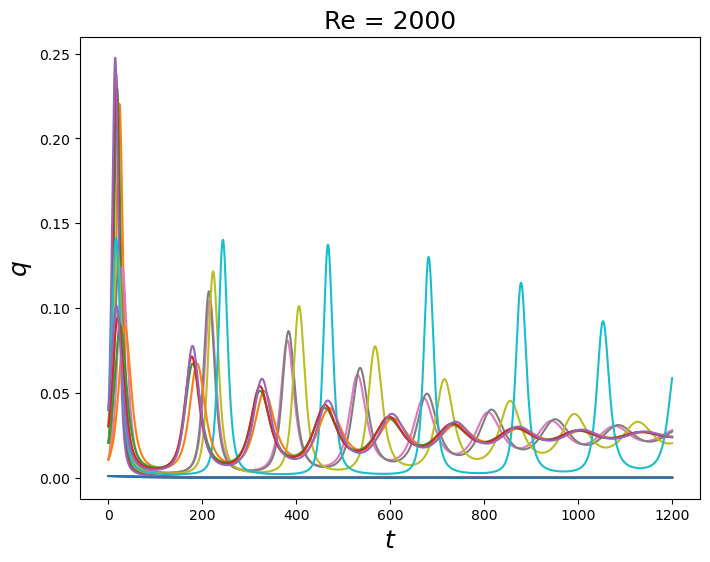

In [21]:
for Re in Res:
    # Run many initial conditions:
    uics = [1-1e-4,1-0.3,1-0.45]
    qics = np.linspace(0.001,0.04,5)
    for u0 in uics:
        for q0 in qics:
            x0 = [u0,q0]
            # Run the integrator
            sol = odeint(rhs,x0,t,args=(beta,a,c1,eta,alpha,Re))

            plt.figure(1,figsize=(8,6))
            if sol[-1,1]<1e-3:
                plt.plot(sol[:,0],sol[:,1],c='ForestGreen')
            else:
                plt.plot(sol[:,0],sol[:,1],c='grey')

            qplt = np.linspace(1e-4,1,1000)
            plt.plot(null_u(qplt,beta,eta,a,alpha,Re),qplt,'--b',lw=2)
            plt.plot(null_q(qplt,beta,eta,a,c1,alpha,Re),qplt,'--r',lw=2)

            plt.figure(2,figsize=(8,6))
            plt.plot(t[t>0],sol[:,1][t>0])

    plt.figure(1,figsize=(8,6))
    plt.title("Re = %s, final time = %.1f" % (Re,t[-1]),fontsize=18)
    plt.xlabel(r'$u$',fontsize=18)
    plt.ylabel(r'$q$',fontsize=18)
    plt.xlim(0,1)
    # plt.ylim(0.04,0.07)
    plt.ylim(0.0,0.1)

    plt.figure(2,figsize=(8,6))
    plt.title("Re = %s" % (Re),fontsize=18)
    plt.xlabel(r'$t$',fontsize=18)
    plt.ylabel(r'$q$',fontsize=18)
    plt.show()

# Linear stability (1D model)

In [22]:
def lin_mat_full(k,qe,u1e,w1e,ulam,wlam,Re,a,b,c1):
    # Build matrix, u0,u1,v1,w1,q0
    mat = np.zeros((5,5),dtype=complex)
    
    # u0 equation
    mat[0,0] = -3*alpha-k**2/Re #-alpha-k**2/Re
    mat[0,1] = -1j*(wlam+w1e)*k/2
    mat[0,2] = -beta*(ulam + u1e)/2
    mat[0,4] = -1j*k*np.cos(theta)*np.sin(theta)*dB(b) # New production term: -dz(B(q0))*cos(theta)*sin(theta). 
    
    # u1 equation
    mat[1,0] = -(wlam+w1e)*1j*k
    mat[1,1] = -(alpha+(k**2+beta**2)/Re)
    mat[1,4] =  -beta*dA(qe,a,eta,Re)*np.cos(theta) # -dy(<u'v'>)*cos(theta) = -beta*A(q0)*cos(theta)
    
    # v1 equation
    mat[2,2] = -(beta**2 + k**2)/Re -beta*(beta*alpha/(beta**2 + k**2))
    mat[2,4] = 1j*k*dA(qe,a,eta,Re)*np.sin(theta) -beta*(2*(beta*1j*k*dA(qe,a,eta,Re)*np.sin(theta))/(beta**2 + k**2)) 
    
    # w1 equation
    mat[3,2] = -1j*k*(beta*alpha/(beta**2 + k**2))
    mat[3,3] = -(beta**2 + k**2)/Re - alpha # last term comes from pressure term
    mat[3,4] = -beta*dA(qe,a,eta,Re)*np.sin(theta) -1j*k*(2*(beta*1j*k*dA(qe,a,eta,Re)*np.sin(theta))/(beta**2 + k**2))

    # q0 equation
    mat[4,0] =  -1j*k*B(qe,b)*np.cos(theta)*np.sin(theta)  # New production term -<u'w'>_0 dz(u0) = -B(q0,Re)*cos(theta)*sin(theta)*dz(u0)
    mat[4,1] = beta*A(qe,a,eta,Re)*np.cos(theta)/2 
    mat[4,2] = A(qe,a,eta,Re)*np.sin(theta)*(1j*k)/2
    mat[4,3] = A(qe,a,eta,Re)*np.sin(theta)*beta/2
    mat[4,4] = beta*np.cos(theta)*(ulam + u1e)*dA(qe,a,eta,Re)/2 +beta*np.sin(theta)*(wlam + w1e)*dA(qe,a,eta,Re)/2 - nu_t(qe,C_t,Re)*k**2 - 2*alpha - deps(qe,c1,Re) - 0.5*(wlam+w1e)**2*k**2/(2*kappa + 2*alpha + beta**2/Re)

    return mat

Instability! Re = 74, kmax = 0.196, Lmax = 32.000
Instability! Re = 76, kmax = 0.209, Lmax = 30.118
Instability! Re = 78, kmax = 0.221, Lmax = 28.444
Instability! Re = 80, kmax = 0.233, Lmax = 26.947
Instability! Re = 82, kmax = 0.245, Lmax = 25.600
Instability! Re = 84, kmax = 0.245, Lmax = 25.600


<Figure size 800x600 with 0 Axes>

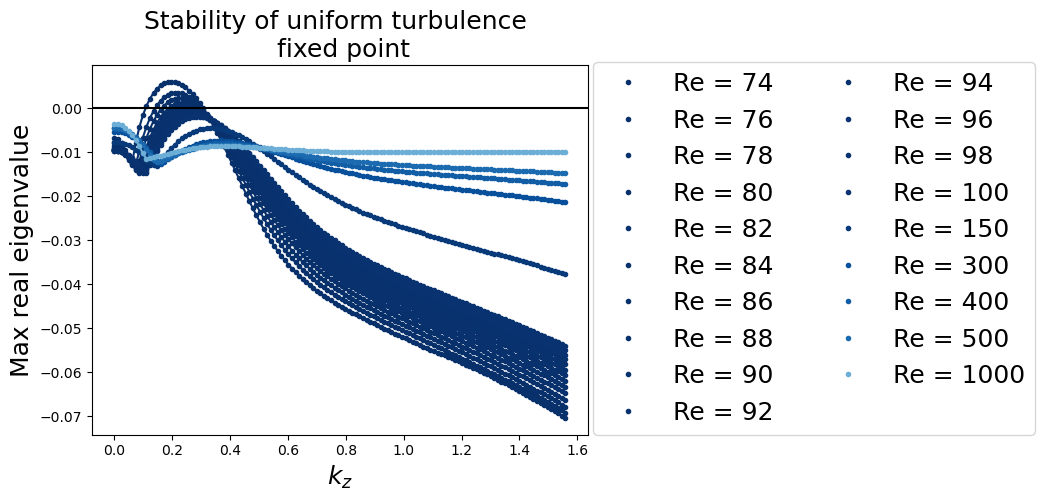

In [24]:
plt.figure(figsize=(8,6))
Res = [
    # 62,
    # 64,
    # 66,
    # 68,
    # 70,
    # 72,
    74,
    76,
    78,
    80,
    82,
    84,
    86,
    88,
    90,
    92,
    94,
    96,
    98,
    100,
    150,
    300,
    400,
    500,
    1000,
]

# Re_s = 92
# nmode = 6

Re_s = np.nan #500
nmode = 32 #23 for eps2=/= 0, 32 for eps2==0

leg = [r'$u_0$',r'$u_1$',r'$\zeta_1$',r'$q_0$',r'$q_1$']

for Re in Res:
    # Find equilibrium
    qplt = np.linspace(1e-4,1,10000)
    # Equilibria
    diff = np.abs(null_u(qplt,beta,eta,a,alpha,Re)-null_q(qplt,beta,eta,a,c1,alpha,Re))
    ind1 = np.argsort(diff)[0]
    ind2 = np.argsort(diff)[1]
    # Check for the largest q
    if qplt[ind1]<qplt[ind2]:
        ind = ind2
    else:
        ind = ind1
    qe = qplt[ind]
    u1_se = null_u(qplt,beta,eta,a,alpha,Re)[ind]-1
    u1e = u1_se*np.cos(theta)
    w1e = u1_se*np.sin(theta)
    
    vec_eq = [0,u1e,beta*w1e,qe,0]
    
    # print(qe,u1_se+1)
    # plt.plot(null_u(qplt,beta,eta,a,alpha,Re),qplt)
    # plt.plot(null_q(qplt,beta,eta,a,c1,c2,alpha,Re),qplt)
    # # plt.plot(qplt,np.abs(null_u(qplt,a,beta,eta,alpha,Re)-null_q(qplt,a,eps1,beta,eta,Re)))
    # # plt.plot(qplt[ind],np.abs(null_u(qplt,a,beta,eta,alpha,Re)-null_q(qplt,a,eps1,beta,eta,Re))[ind],'xr')
    # plt.plot(u1_se+1,qe,'xr')
    # plt.title(Re)
    # plt.xlim(0,1)
    # plt.ylim(0,0.15)
    # plt.show()
    
    ks = np.arange(0,int(Lz/4))*2*np.pi/Lz
    z = np.linspace(0,Lz/4,1000)
    eigs = []
    for k in ks:
        vals,vecs=np.linalg.eig(lin_mat_full(k,qe,u1e,w1e,ulam,wlam,Re,a,b,c1))
        vals = vals[np.argsort(np.real(vals))]
        vecs = vecs[:,np.argsort(np.real(vals))]
        eigs.append(np.max(np.real(vals)))
    eigs = np.array(eigs)
    
    if Re == Re_s:
        plt.figure(2)
        plt.plot(ks,eigs,'.-',c=cm.Reds_r((Re-np.min(Res))/(np.max(Res)-np.min(Res))/2))
        plt.plot(k,np.nan*np.max(np.real(vals)),'.',c=cm.Reds_r((Re-np.min(Res))/(np.max(Res)-np.min(Res))/2),label="Re = %i" % Re)
    else:
        plt.figure(2)
        plt.plot(ks,eigs,'.-',c=cm.Blues_r((Re-np.min(Res))/(np.max(Res)-np.min(Res))/2))
        plt.plot(k,np.nan*np.max(np.real(vals)),'.',c=cm.Blues_r((Re-np.min(Res))/(np.max(Res)-np.min(Res))/2),label="Re = %i" % Re)
    if np.any(eigs>0):
        print('Instability! Re = %i, kmax = %.3f, Lmax = %.3f' % (Re,ks[eigs==eigs.max()],2*np.pi/(ks[eigs==eigs.max()])))

if ~np.isnan(Re_s):
    plt.figure(1)
    plt.xlabel('real')
    plt.ylabel('imag')
    
    plt.figure(3)
    plt.xlabel(r'$z$',fontsize=20)
    plt.legend(loc=(1.01,0.0),fontsize=20)
    plt.xlim(0,2*np.pi/ks[nmode])
    # plt.savefig(odir+'fields_Re'+str(Re_s)+'.png',dpi=150,bbox_inches='tight')

    plt.figure(4)
    plt.xlabel(r'$z$',fontsize=20)
    plt.legend(loc=(1.01,0.0),fontsize=20)
    plt.xlim(0,2*np.pi/ks[nmode])
    # plt.savefig(odir+'budget_u0_Re'+str(Re_s)+'.png',dpi=150,bbox_inches='tight')

    plt.figure(5)
    plt.xlabel(r'$z$',fontsize=20)
    plt.legend(loc=(1.01,0.0),fontsize=20)
    plt.xlim(0,2*np.pi/ks[nmode])
    # plt.savefig(odir+'budget_u1_Re'+str(Re_s)+'.png',dpi=150,bbox_inches='tight')

    plt.figure(6)
    plt.xlabel(r'$z$',fontsize=20)
    plt.legend(loc=(1.01,0.0),fontsize=20)
    plt.xlim(0,2*np.pi/ks[nmode])
    # plt.savefig(odir+'budget_zeta1_Re'+str(Re_s)+'.png',dpi=150,bbox_inches='tight')

    plt.figure(7)
    plt.xlabel(r'$z$',fontsize=20)
    plt.legend(loc=(1.01,0.0),fontsize=20)
    plt.xlim(0,2*np.pi/ks[nmode])
    # plt.savefig(odir+'budget_q0_Re'+str(Re_s)+'.png',dpi=150,bbox_inches='tight')

    plt.figure(8)
    plt.xlabel(r'$z$',fontsize=20)
    plt.legend(loc=(1.01,0.0),fontsize=20)
    plt.xlim(0,2*np.pi/ks[nmode])
    # plt.savefig(odir+'budget_q1_Re'+str(Re_s)+'.png',dpi=150,bbox_inches='tight')

plt.figure(2)        
plt.axhline(y=0,c='k',ls='-')
plt.xlabel(r"$k_z$",fontsize=18)
plt.ylabel("Max real eigenvalue",fontsize=18)
plt.title("Stability of uniform turbulence \n fixed point",fontsize=18)
plt.legend(fontsize=18,loc=(1.01,0.0),ncol=2)
# plt.xlim(0,0.5)
# plt.ylim(-0.02,0.02)
plt.show()

# Linear stability (2D)

In [26]:
def lin_mat(kx,kz,qe,u1e,alpha,beta,a,c1,Re):
    # Build matrix, u0,u1,v1,w0,w1,q0
    mat = np.zeros((6,6),dtype=complex)

    # u0 equation
    mat[0,0] = -((kx**2+kz**2)/Re + 3*alpha)
    mat[0,1] = -0.5*1j*kx*(1+u1e)
    mat[0,2] = -0.5*beta*(1+u1e) -1j*kx*((1j*kx*(1+u1e)*beta)/(kx**2+kz**2)) # Last term comes from pressure

    # u1 equation
    mat[1,0] = -1j*kx*(1+u1e)
    mat[1,1] = - ((kx**2+kz**2 + beta**2)/Re + alpha)
    mat[1,2] = -1j*kx*alpha*beta/(kx**2 + beta**2 + kz**2) # Comes from pressure term
    mat[1,5] = -beta*dA(qe,a,eta,Re) -1j*kx*(1j*kx*2*beta*dA(qe,a,eta,Re))/(kx**2 + beta**2 + kz**2) # Last term comes from pressure term
    
    # v1 equation
    mat[2,2] = - (kx**2+kz**2 + beta**2)/Re -beta*alpha*beta/(kx**2 + beta**2 + kz**2) # Last term comes from pressure term
    mat[2,5] = 1j*kx*dA(qe,a,eta,Re) -beta*(1j*kx*2*beta*dA(qe,a,eta,Re))/(kx**2 + beta**2 + kz**2) # Last term comes from pressure term
    
    # w0 equation
    mat[3,3] = -((kx**2+kz**2)/Re + 3*alpha)
    mat[3,2] = -1j*kz*((1j*kx*(1+u1e)*beta)/(kx**2+kz**2)) # Comes from pressure term
    mat[3,4] = -0.5*1j*kx*(1+u1e)
    
    # w1 equation
    mat[4,2] = -1j*kz*alpha*beta/(kx**2 + beta**2 + kz**2) # comes from pressure
    mat[4,3] = -1j*kx*(1+u1e)
    mat[4,4] = -((kx**2+kz**2 + beta**2)/Re + alpha)
    mat[4,5] = -1j*kz*(1j*kx*2*beta*dA(qe,a,eta,Re))/(kx**2 + beta**2 + kz**2) # Comes from pressure
    
    # q0 equation
    mat[5,1] = 0.5*A(qe,a,eta,Re)*beta
    mat[5,2] = 0.5*A(qe,a,eta,Re)*1j*kx
    mat[5,5] = 0.5*dA(qe,a,eta,Re)*(beta*(1+u1e)) - 2*alpha -deps(qe,c1,Re) -(kx**2+kz**2)*(nu_t(qe,C_t,Re)) - 0.5 * (1+u1e)**2 * kx**2 * (2*alpha + 2*kappa + beta**2/Re)**(-1)

    return mat

C:\Users\santi\AppData\Local\Temp\ipykernel_2664\341948304.py:75: UserWarning: No contour levels were found within the data range.
  plt.contour(KX,KZ,np.ones(EIGS.shape)*(EIGS>=0),levels=[0,1.0],colors='k')


Instability! Re = 74, (kx,kz) = (0.074,0.196), (nx,nz) = (6.000,16.000), theta = 20.556,|k|_max = 0.210, |L|_max = 29.963


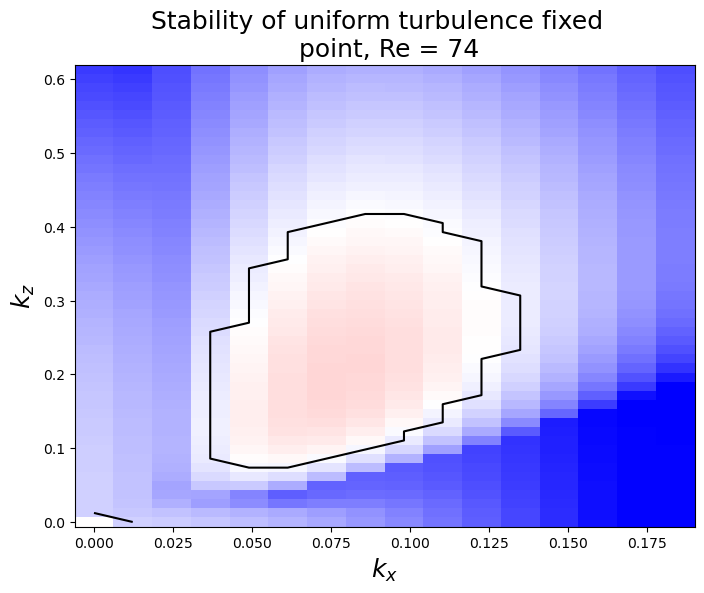

Instability! Re = 76, (kx,kz) = (0.086,0.221), (nx,nz) = (7.000,18.000), theta = 21.251,|k|_max = 0.237, |L|_max = 26.510


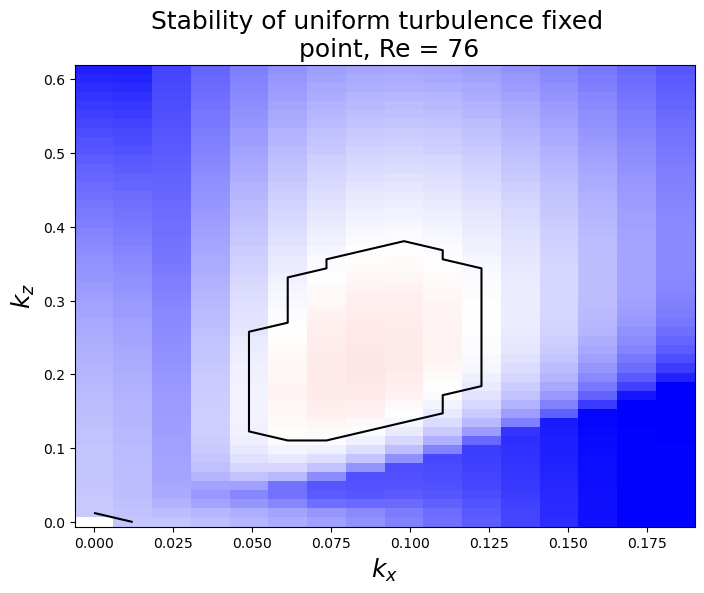

Instability! Re = 78, (kx,kz) = (0.086,0.221), (nx,nz) = (7.000,18.000), theta = 21.251,|k|_max = 0.237, |L|_max = 26.510


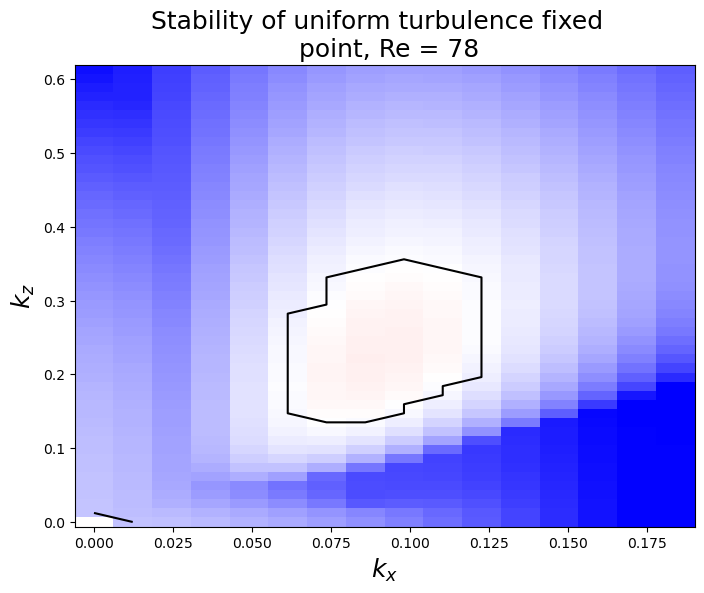

Instability! Re = 80, (kx,kz) = (0.098,0.233), (nx,nz) = (8.000,19.000), theta = 22.834,|k|_max = 0.253, |L|_max = 24.836


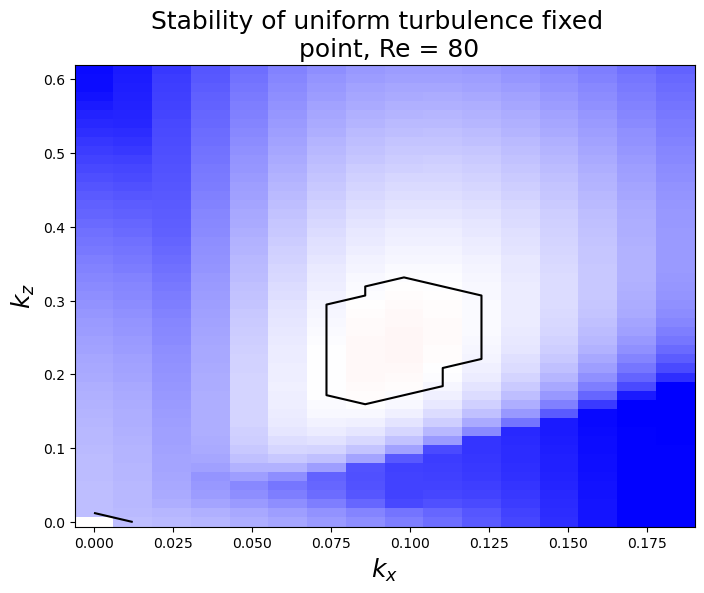

Instability! Re = 82, (kx,kz) = (0.098,0.245), (nx,nz) = (8.000,20.000), theta = 21.801,|k|_max = 0.264, |L|_max = 23.769


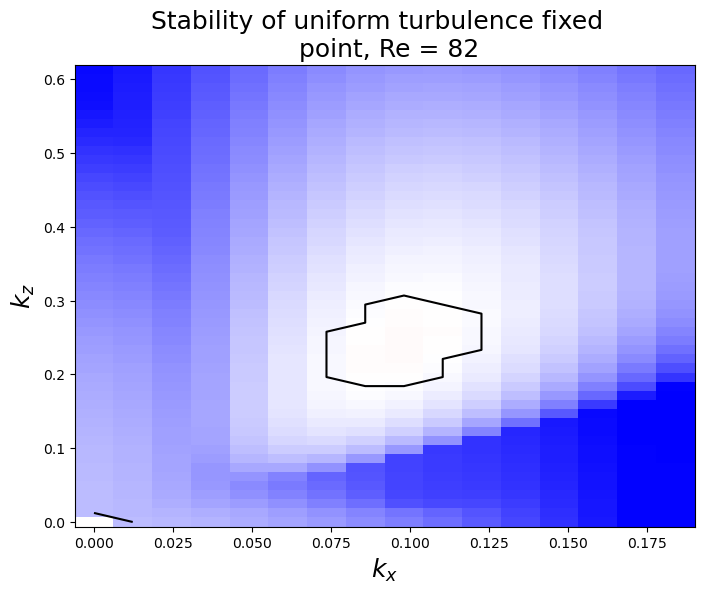

Instability! Re = 84, (kx,kz) = (0.098,0.245), (nx,nz) = (8.000,20.000), theta = 21.801,|k|_max = 0.264, |L|_max = 23.769


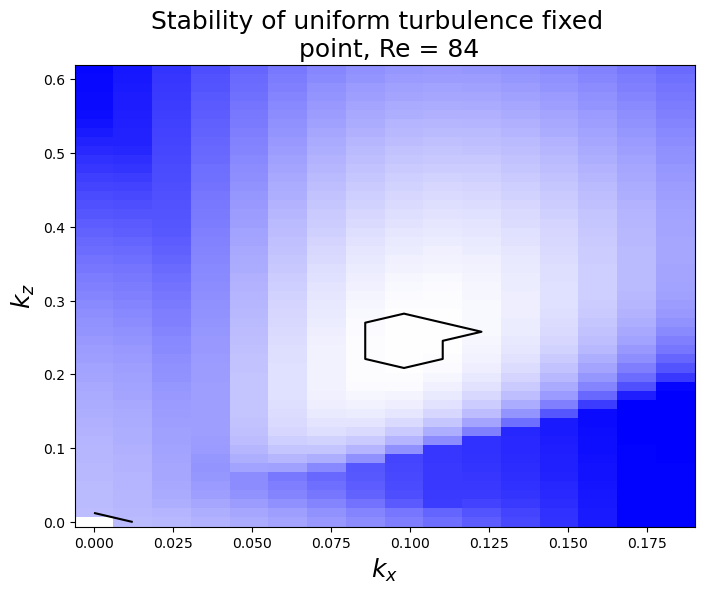

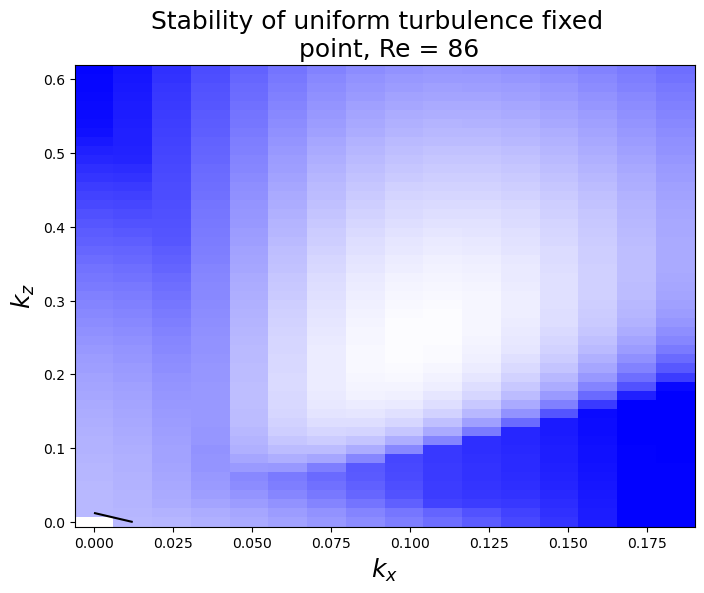

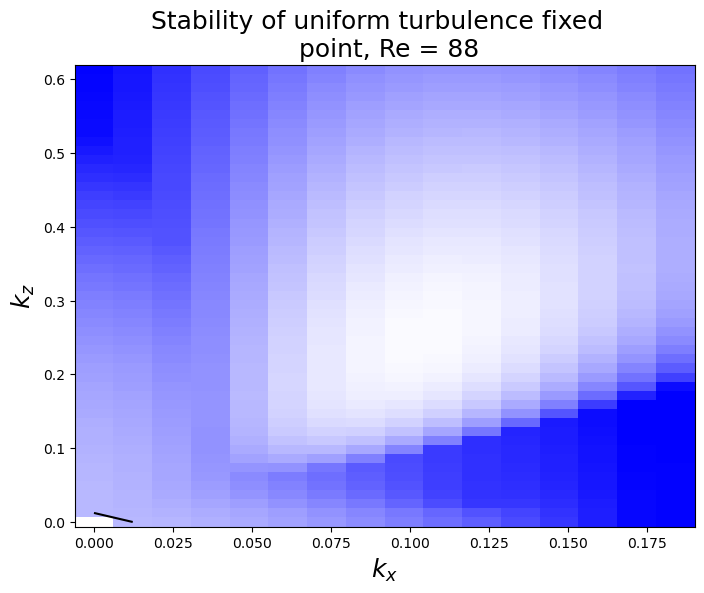

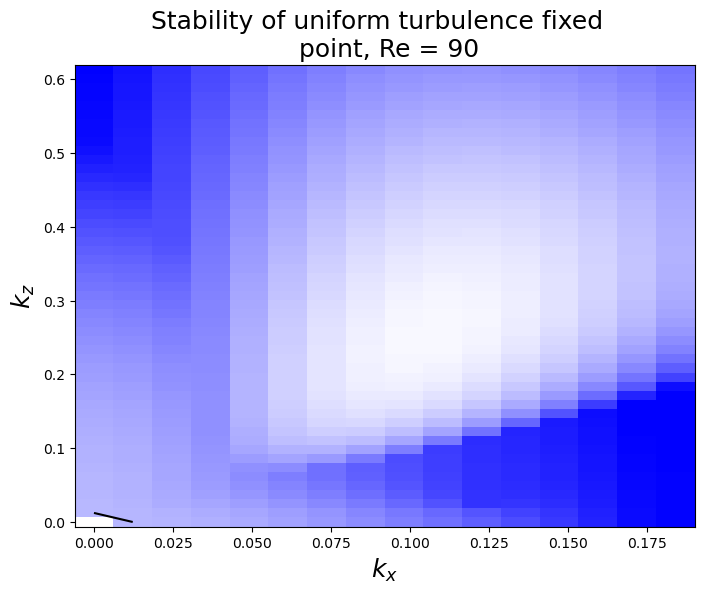

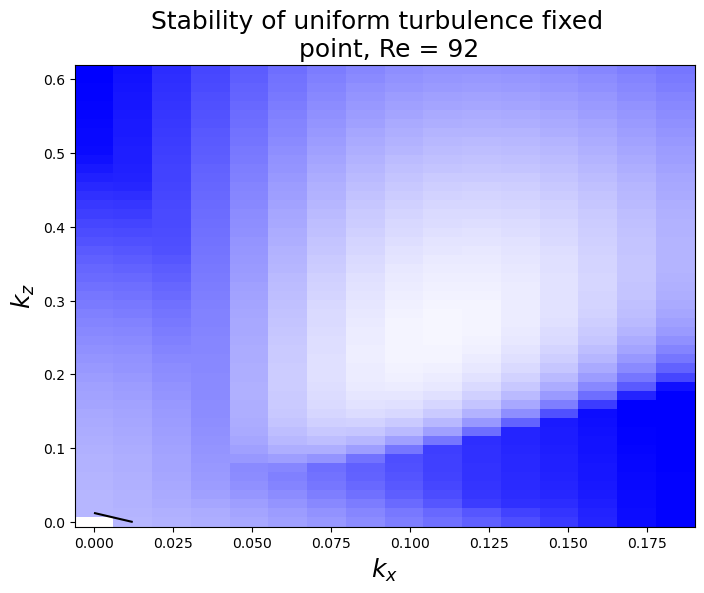

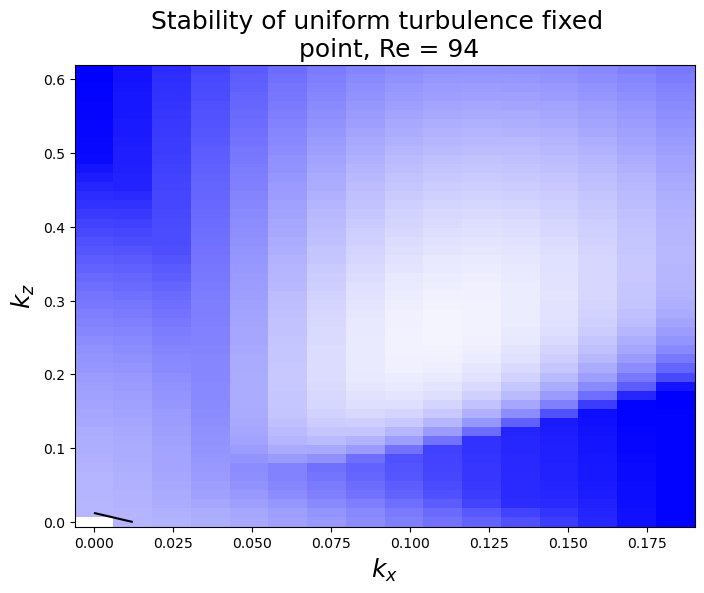

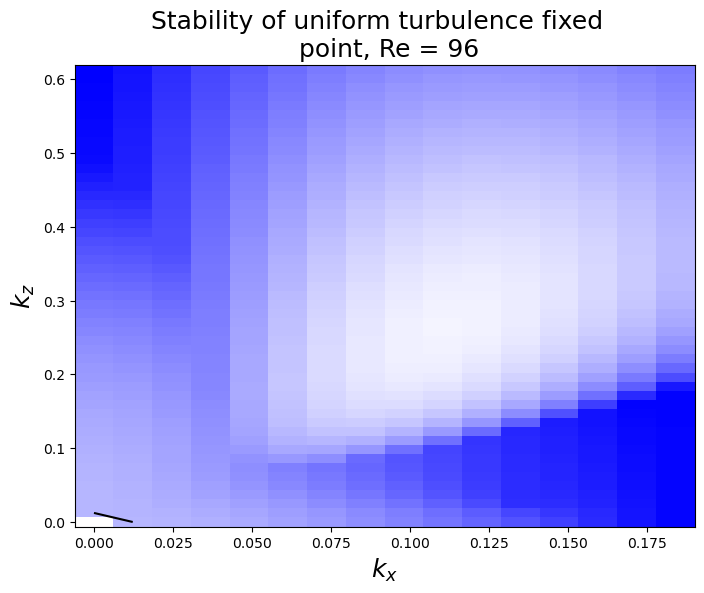

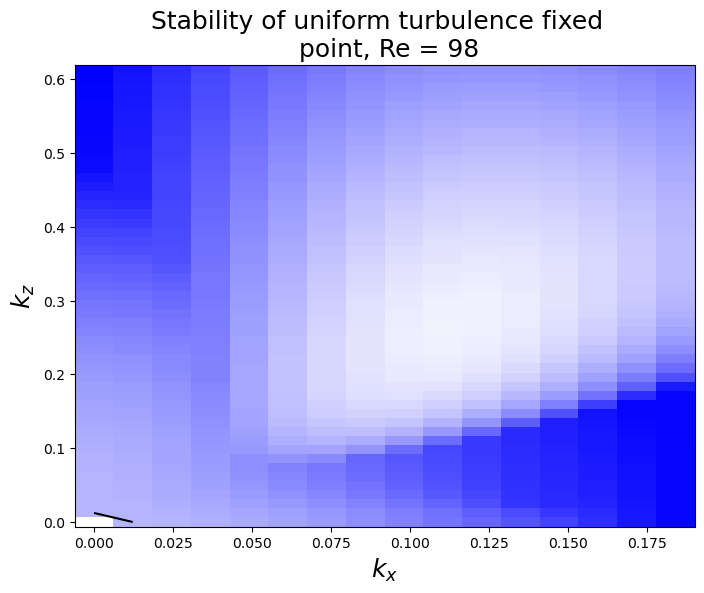

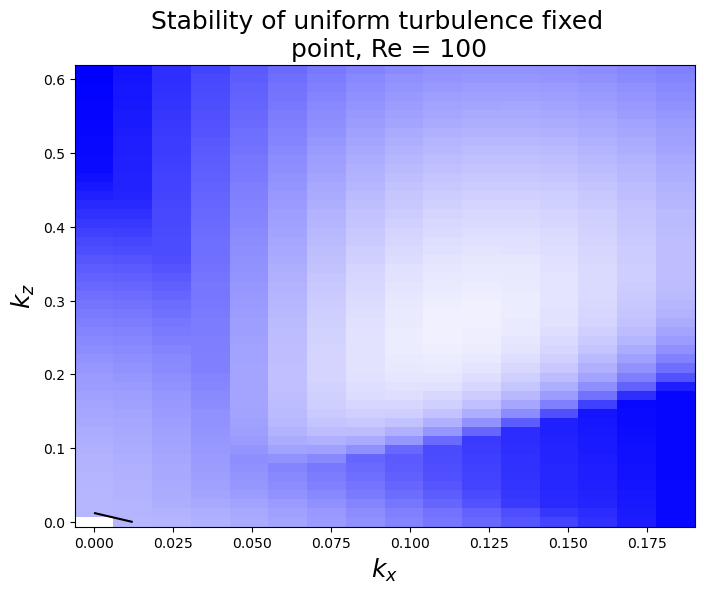

In [28]:
Res = [
    # 62,
    # 64,
    # 66,
    # 68,
    # 70,
    # 72,
    74,
    76,
    78,
    80,
    82,
    84,
    86,
    88,
    90,
    92,
    94,
    96,
    98,
    100,
    # 150,
    # 300,
    # 400,
    # 500,
    # 1000,
]
for Re in Res:
    # Find equilibrium
    qplt = np.linspace(1e-4,1,10000)
    # Equilibria
    diff = np.abs(null_u(qplt,beta,eta,a,alpha,Re)-null_q(qplt,beta,eta,a,c1,alpha,Re))
    ind1 = np.argsort(diff)[0]
    ind2 = np.argsort(diff)[1]
    # Check for the largest q
    if qplt[ind1]<qplt[ind2]:
        ind = ind2
    else:
        ind = ind1
    qe = qplt[ind]
    u1_se = null_u(qplt,beta,eta,a,alpha,Re)[ind]-1
    u1e = u1_se*np.cos(theta)
    w1e = u1_se*np.sin(theta)
    
    vec_eq = [0,u1e,beta*w1e,qe,0]
    
    # print(qe,u1e+1)
    # plt.figure(figsize=(8,6))
    # plt.plot(null_u(qplt,beta,eta,a,alpha,Re),qplt)
    # plt.plot(null_q(qplt,beta,eta,a,c1,c2,alpha,Re),qplt)
    # # plt.plot(qplt,np.abs(null_u(qplt,a,beta,eta,alpha,Re)-null_q(qplt,a,eps1,eps2,beta,eta,Re)))
    # # plt.plot(qplt[ind],np.abs(null_u(qplt,a,beta,eta,alpha,Re)-null_q(qplt,a,eps1,eps2,beta,eta,Re))[ind],'xr')
    # plt.plot(u1e+1,qe,'xr')
    # plt.xlim(0,1)
    # plt.ylim(0,0.3)
    # plt.show()
    
    kzs = np.arange(0,int(Lz/10))*2*np.pi/Lz
    kxs = np.arange(0,int(Lx/32))*2*np.pi/Lx
    KX,KZ = np.meshgrid(kxs,kzs,indexing='ij')
    EIGS = np.zeros(KX.shape)
    for ii,kx in enumerate(kxs):
        for jj,kz in enumerate(kzs):
            if (kx==0)&(kz==0):
                continue
            # print(k)
            vals,vecs=np.linalg.eig(lin_mat(kx,kz,qe,u1_se,alpha,beta,a,c1,Re))
            # print(np.max(np.real(vals)))
            EIGS[ii,jj]=np.max(np.real(vals))

            
    plt.figure(figsize=(8,6))
    cbar= np.max(np.abs(EIGS))
    plt.pcolormesh(KX,KZ,EIGS,vmin=-cbar,vmax=cbar,cmap='bwr')
    plt.contour(KX,KZ,np.ones(EIGS.shape)*(EIGS>=0),levels=[0,1.0],colors='k')
    # plt.colorbar()
    if np.any(EIGS>0):
        print('Instability! Re = %i, (kx,kz) = (%.3f,%.3f), (nx,nz) = (%.3f,%.3f), theta = %.3f,|k|_max = %.3f, |L|_max = %.3f' % (Re,KX[EIGS==EIGS.max()],KZ[EIGS==EIGS.max()],KX[EIGS==EIGS.max()]*Lx/2/np.pi,KZ[EIGS==EIGS.max()]*Lz/2/np.pi,90-np.arctan(KZ[EIGS==EIGS.max()]/KX[EIGS==EIGS.max()])*180/np.pi,np.sqrt(KX[EIGS==EIGS.max()]**2+ KZ[EIGS==EIGS.max()]**2),2*np.pi/(np.sqrt(KX[EIGS==EIGS.max()]**2+ KZ[EIGS==EIGS.max()]**2))))
    # plt.axhline(y=0,c='k',ls='-')
    plt.xlabel(r"$k_x$",fontsize=18)
    plt.ylabel(r"$k_z$",fontsize=18)
    # plt.ylabel("Max real eigenvalue",fontsize=18)
    plt.title("Stability of uniform turbulence fixed  \n point, Re = %i" % (Re),fontsize=18)
    # plt.legend(fontsize=18,loc=(1.01,0.0))
    # plt.xlim(0,0.5)
    # plt.ylim(-0.02,0.02)
    plt.show()